In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data.drop(columns=['car_ID'],inplace=True,axis=1)
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# finding null value

In [3]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

In [4]:
categorical_features = [i for i in data.columns if data[i].dtype == 'object']
numerical_features = [i for i in data.columns if data[i].dtype != 'object']
print(f"cat_features:{categorical_features}\n\nnum_features:{numerical_features}\n")
print(f"total categorical features are {len(categorical_features)} and total numerical features are {len(numerical_features)}")

cat_features:['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

num_features:['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

total categorical features are 10 and total numerical features are 15


*categorical features*

CarName

In [5]:
print(data['CarName'].nunique())

147


[]

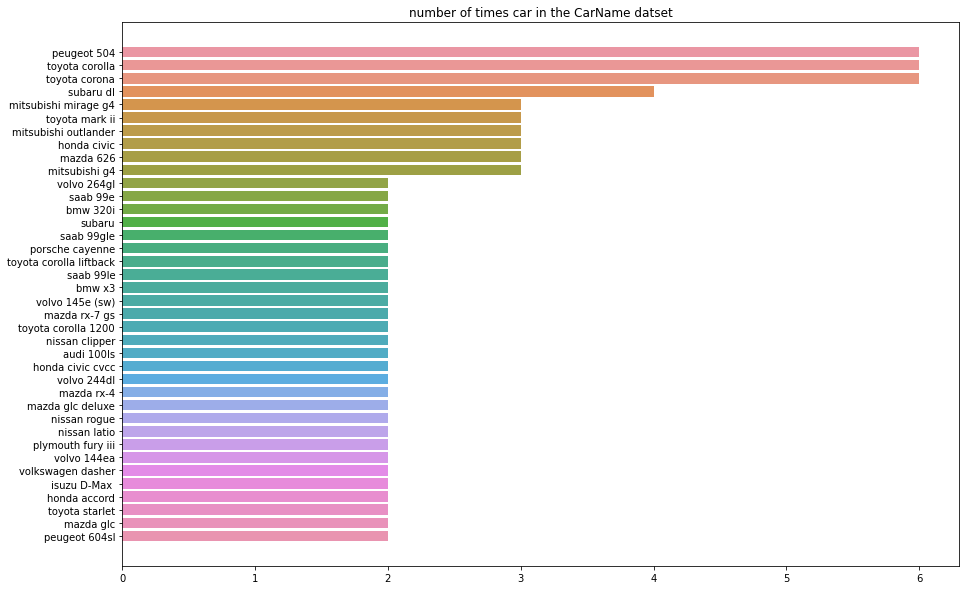

In [6]:
fig,ax = plt.subplots(figsize=(15,10))
carname = data['CarName'].value_counts().sort_values(ascending=False)
carname = carname.loc[carname.values > 1]
ax = sns.barplot(x=carname.values,y=carname.index)
ax.set_title('number of times car in the CarName datset')
plt.plot()

we can see top cars that comes in the carname column.

fueltype

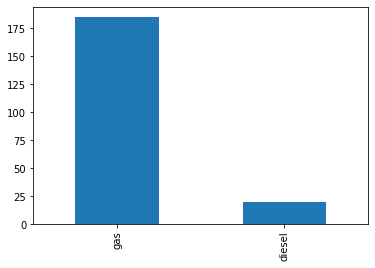

In [7]:
fuel = data['fueltype'].value_counts().plot(kind='bar')
plt.show()

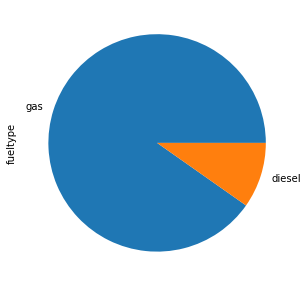

In [8]:
pie = data['fueltype'].value_counts().plot.pie(figsize=(5,5))

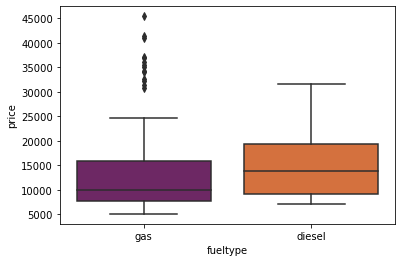

In [9]:
sns.boxplot(x=data['fueltype'], y=data['price'], palette='inferno')

there is total 185 car with gas fuel type and 20 car with diesel fuel type. there are some outliar's in gas fueltype.

aspiration

In [10]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

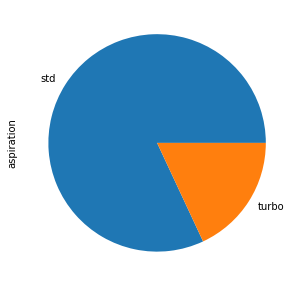

In [11]:
data['aspiration'].value_counts().plot.pie(figsize=(5,5))

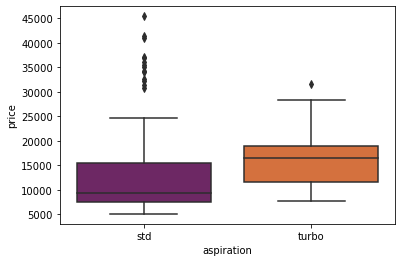

In [12]:
sns.boxplot(x=data['aspiration'], y=data['price'], palette='inferno')

most of the cars are having std aspiration. 

doornumber

In [13]:
data['doornumber'].unique()

array(['two', 'four'], dtype=object)

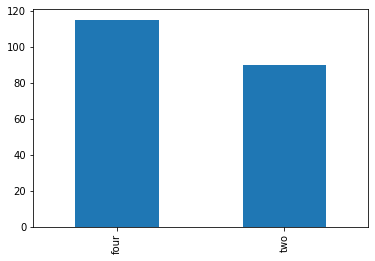

In [14]:
doornumber = data['doornumber'].value_counts().plot(kind='bar')
plt.show()

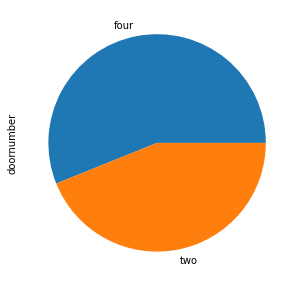

In [15]:
data['doornumber'].value_counts().plot.pie(y=data['doornumber'] , figsize=(5,5))

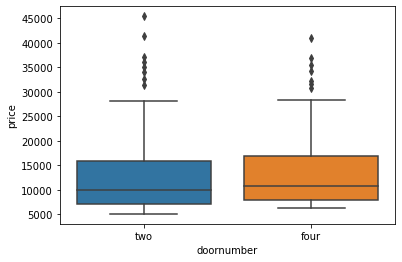

In [16]:
sns.boxplot(x=data['doornumber'], y=data['price'])

1. there is two value in that column is "four" and "two".
2. we use that column as onehot encode. 
3. most of the expensive car has two doors.

carbody

In [17]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

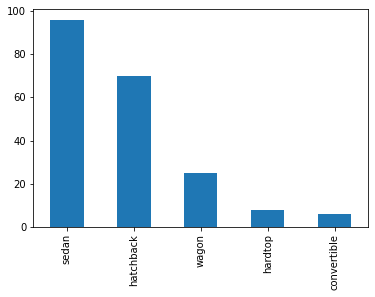

In [18]:
carbody = data['carbody'].value_counts().plot(kind='bar')
plt.show()

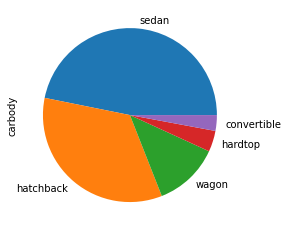

In [19]:
data['carbody'].value_counts().plot.pie()

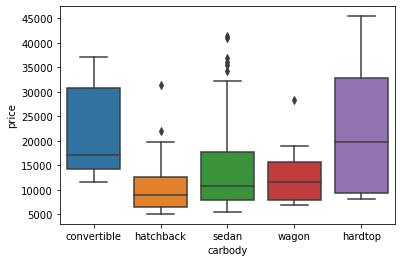

In [20]:
sns.boxplot(x=data['carbody'], y=data['price'])

most of the car have sedan car body. most of the expensive car has hardtop body.

drivewheel

In [21]:
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

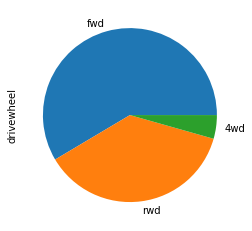

In [22]:
data['drivewheel'].value_counts().plot.pie()

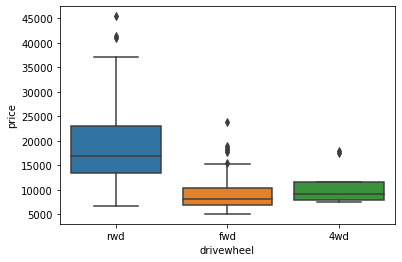

In [23]:
sns.boxplot(x=data['drivewheel'], y=data['price'])

most of the car using fwd drivewheel. 

enginelocation

In [24]:
data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

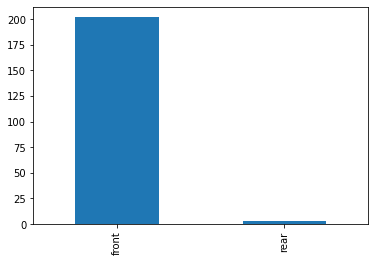

In [25]:
data['enginelocation'].value_counts().plot(kind='bar')
plt.show()

most of the car has front engine location.

enginetype

In [26]:
data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

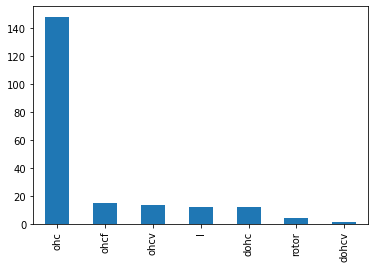

In [27]:
data['enginetype'].value_counts().plot(kind='bar')
plt.show()

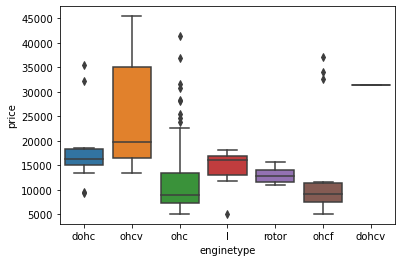

In [28]:
sns.boxplot(x=data['enginetype'], y=data['price'])

'ohcv' engine used in expensive car. and most of car has ohc engine.

cylindernumber

In [29]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [30]:
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

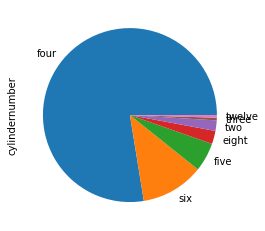

In [31]:
data['cylindernumber'].value_counts().plot.pie()

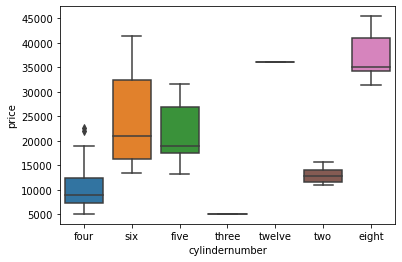

In [32]:
sns.boxplot(x=data['cylindernumber'], y=data['price'])

three and twelve cylinder number are only come in once.

fuelsystem

In [33]:
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

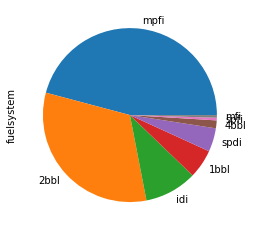

In [34]:
data['fuelsystem'].value_counts().plot.pie()

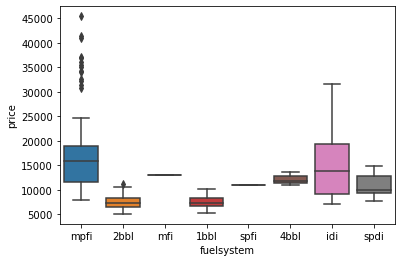

In [35]:
sns.boxplot(x=data['fuelsystem'], y=data['price'])

mfi and spfi come up only once. most of the car has mpfi fuel system.

*numerical features*

symboling

In [36]:
data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

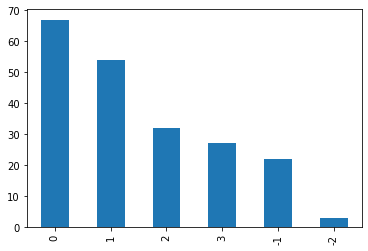

In [37]:
data['symboling'].value_counts().plot(kind='bar')
plt.show()

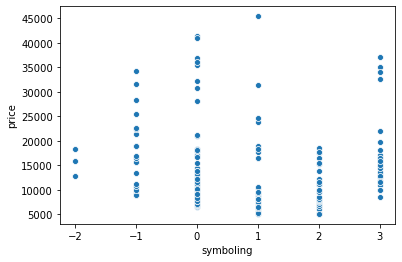

In [38]:
sns.scatterplot(x=data['symboling'], y=data['price'])

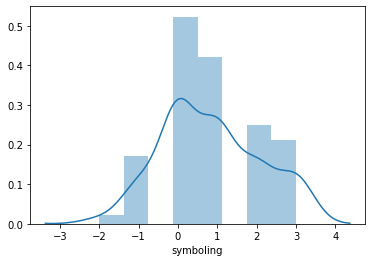

In [39]:
sns.distplot(data['symboling'])

there is no relation between price and symboling.

wheelbase

In [40]:
data['wheelbase'].corr(data['price'])

0.5778155982921496

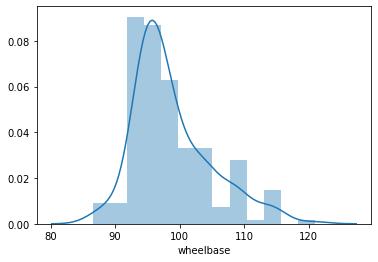

In [41]:
sns.distplot(data['wheelbase'])

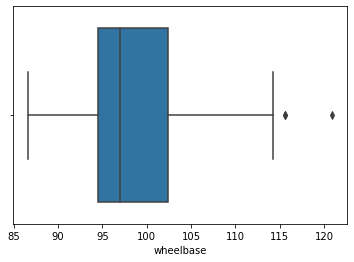

In [42]:
sns.boxplot(data['wheelbase'])

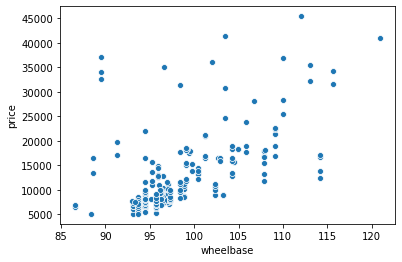

In [43]:
sns.scatterplot(x=data['wheelbase'], y=data['price'])

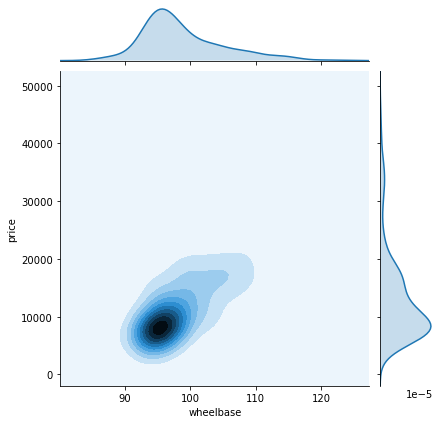

In [44]:
sns.jointplot(x='wheelbase', y='price',data=data,kind='kde')

outliars after wheelbase value 115.

carlength - 
carwidth - 
carheight

In [45]:
print(data['carlength'].corr(data['price']))
print(data['carwidth'].corr(data['price']))
print(data['carheight'].corr(data['price']))

0.6829200156779629
0.7593252997415118
0.11933622657049436


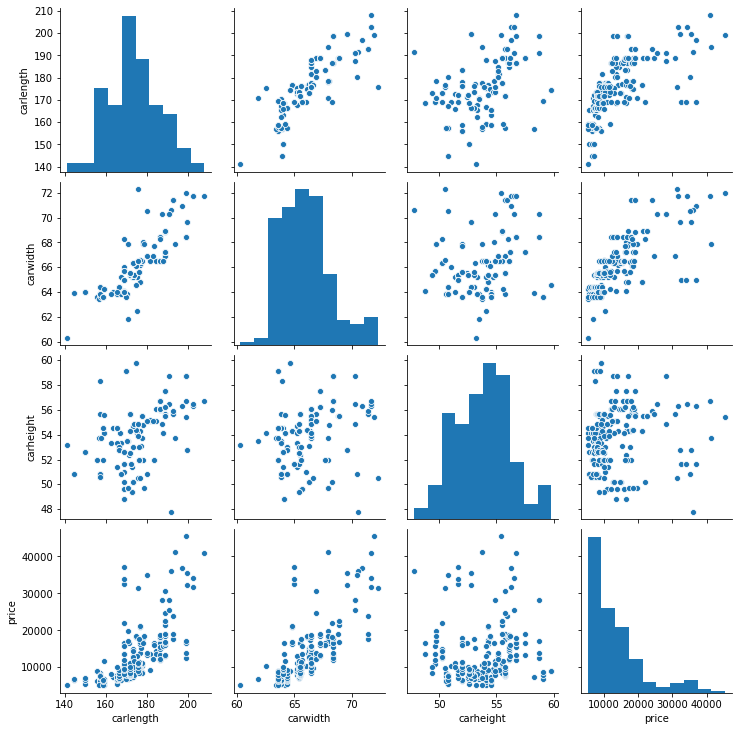

In [46]:
sns.pairplot(data,vars=['carlength','carwidth','carheight','price'])

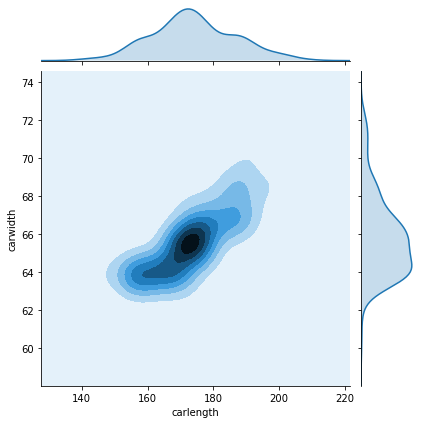

In [47]:
sns.jointplot(x='carlength', y='carwidth', data=data, kind='kde')

relation between car height,length,width. strong relation between length and width.

curbweight

In [48]:
data['curbweight'].corr(data['price'])

0.8353048793372965

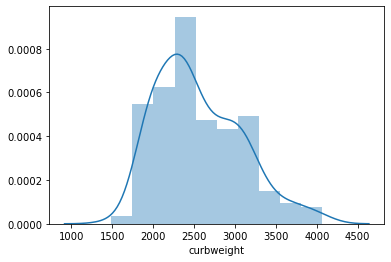

In [49]:
sns.distplot(data['curbweight'])

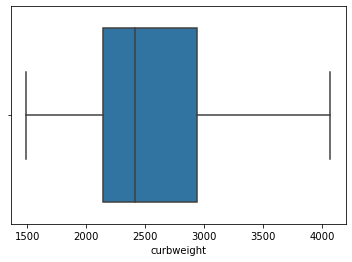

In [50]:
sns.boxplot(data['curbweight'])

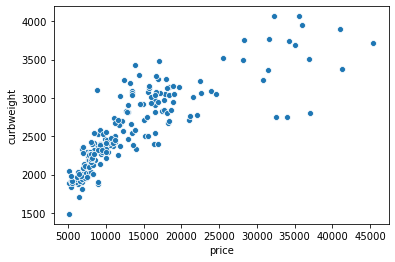

In [51]:
sns.scatterplot(x=data['price'], y=data['curbweight'])

enginesize

In [52]:
data['enginesize'].corr(data['price'])

0.8741448025245112

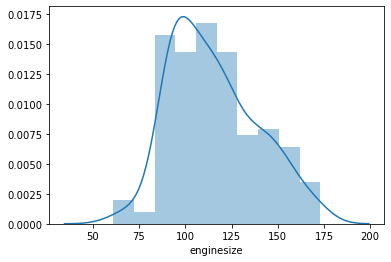

In [53]:
sns.distplot(data['enginesize'].loc[data['enginesize'] < 175])

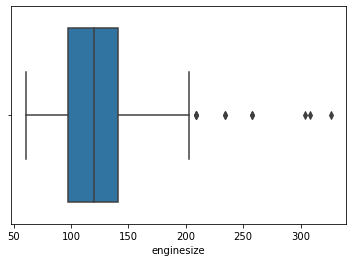

In [54]:
sns.boxplot(data['enginesize'])

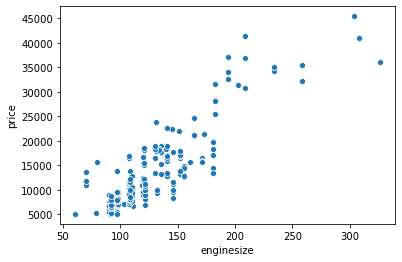

In [55]:
sns.scatterplot(x=data['enginesize'], y=data['price'])

outliars after 200 of engine size.

boreratio

In [56]:
data['boreratio'].corr(data['price'])

0.5531732367984434

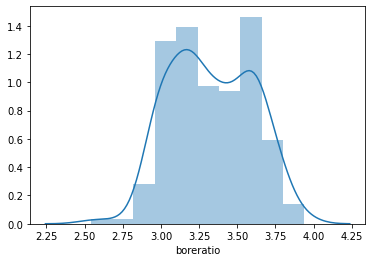

In [57]:
sns.distplot(data['boreratio'])

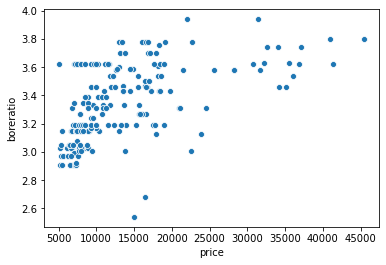

In [58]:
sns.scatterplot(x=data['price'], y=data['boreratio'])

stroke

In [59]:
data['stroke'].corr(data['price'])

0.079443083881931

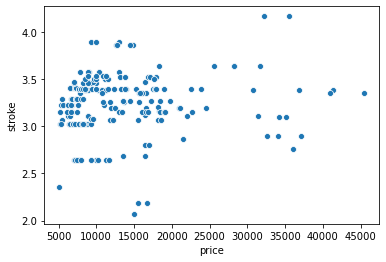

In [60]:
sns.scatterplot(x=data['price'], y=data['stroke'])

there is no relation between stroke and price.

compressionratio

In [61]:
data['compressionratio'].loc[data['compressionratio'] < 12].corr(data['price'])

-0.17511712889018066

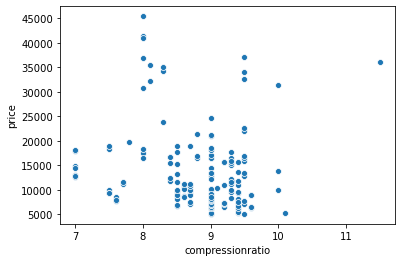

In [62]:
sns.scatterplot(x=data['compressionratio'], y=data['price'].loc[data['compressionratio'] < 12])

horsepower

In [63]:
data['horsepower'].corr(data['price'])

0.8081388225362212

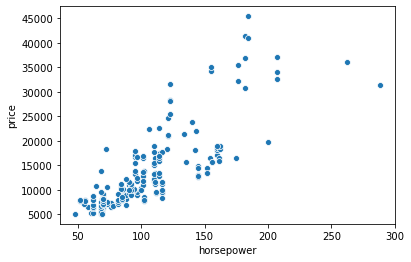

In [64]:
sns.scatterplot(x=data['horsepower'], y=data['price'])

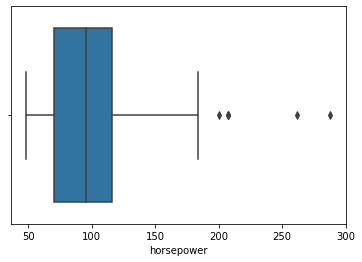

In [65]:
sns.boxplot(data['horsepower'])

strong relation between price and horsepower.

peakrpm

In [66]:
data['peakrpm'].corr(data['price'])

-0.08526715027785685

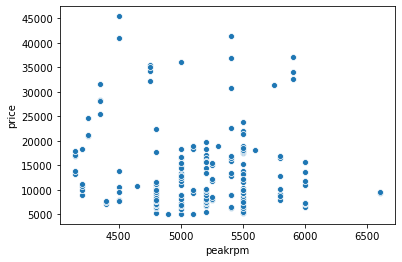

In [67]:
sns.scatterplot(x=data['peakrpm'], y=data['price'])

no relation between peakrpm and price.

citympg

In [68]:
data['citympg'].corr(data['price'])

-0.6857513360270401

In [69]:
data['citympg'].unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33])

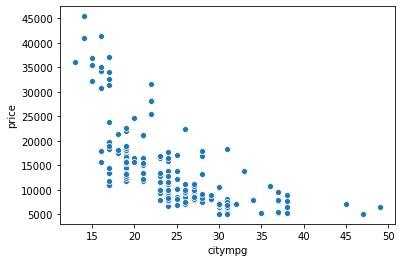

In [70]:
sns.scatterplot(x=data['citympg'], y=data['price'])

price and citympg have negative correlation.

highwaympg

In [71]:
data['highwaympg'].corr(data['price'])

-0.6975990916465566

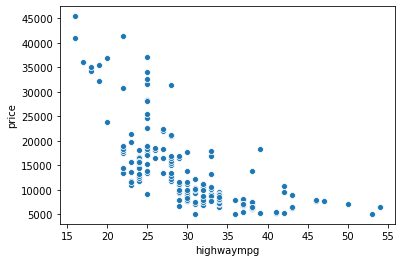

In [72]:
sns.scatterplot(x=data['highwaympg'], y=data['price'])

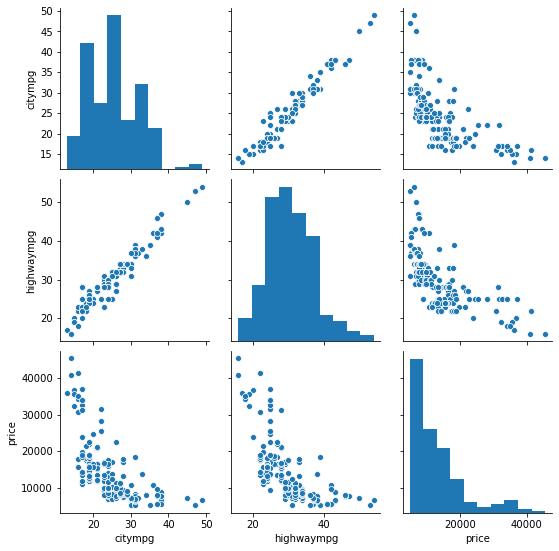

In [73]:
sns.pairplot(data=data,vars=['citympg','highwaympg','price'])

citympg and highwaympg are highly corelated but they are negatively correlated to price.

price

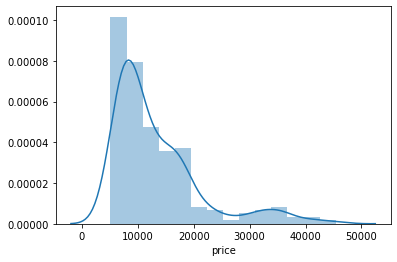

In [74]:
sns.distplot(data['price'])

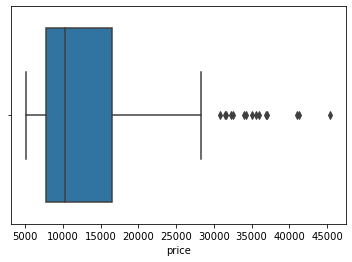

In [75]:
sns.boxplot(data['price'])

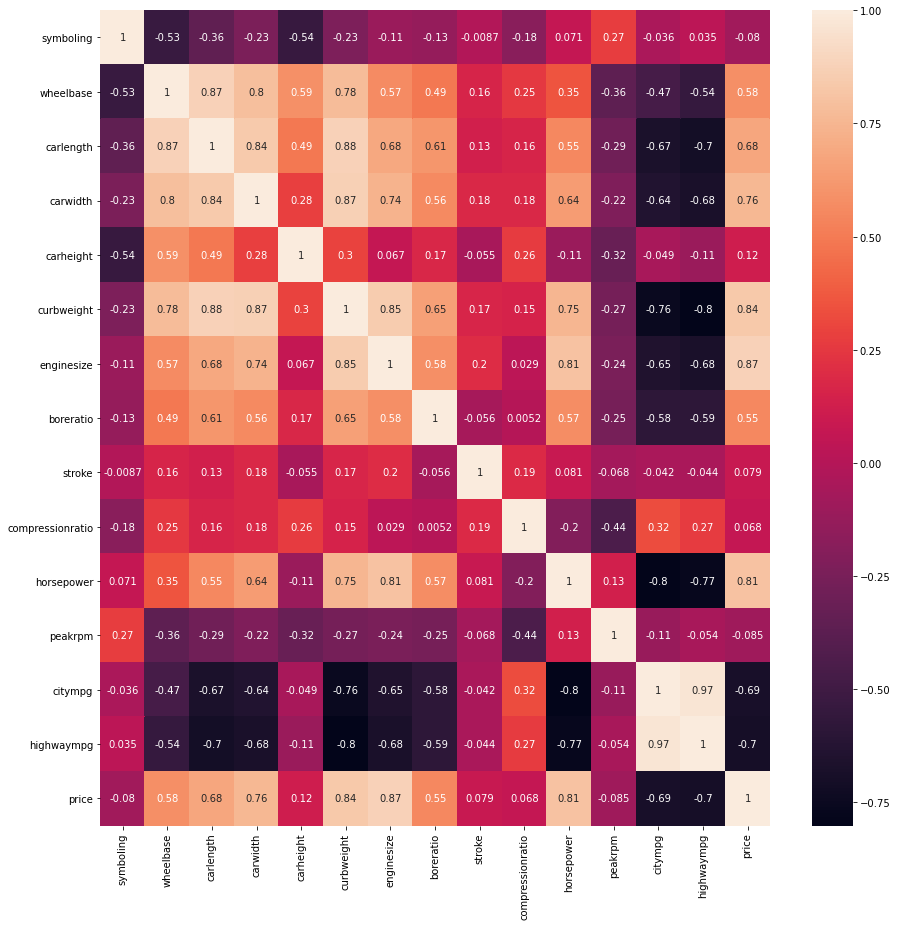

enginesize        --> 0.87 (abs)
curbweight        --> 0.84 (abs)
horsepower        --> 0.81 (abs)
carwidth          --> 0.76 (abs)
highwaympg        --> 0.70 (abs)
citympg           --> 0.69 (abs)
carlength         --> 0.68 (abs)
wheelbase         --> 0.58 (abs)
boreratio         --> 0.55 (abs)
carheight         --> 0.12 (abs)
peakrpm           --> 0.09 (abs)
symboling         --> 0.08 (abs)
stroke            --> 0.08 (abs)
compressionratio  --> 0.07 (abs)


In [76]:
fig,ax = plt.subplots(figsize=(15,15))
correlation = data.corr()
ax = sns.heatmap(correlation,annot=True)
plt.show()
series = np.abs(correlation['price']).sort_values(ascending=False)
for i, row in enumerate(series):
    if 0<=row<1:
        print(f"{series.index[i]:17} --> {row:.2f} (abs)")

1. wheelbase, carlength, carwidth, curbweight, enginesize, boreration, horsepower, price are correlated with each other.
2. highwaympg, citympg are negatively correlated to alomost every other feature except each other.

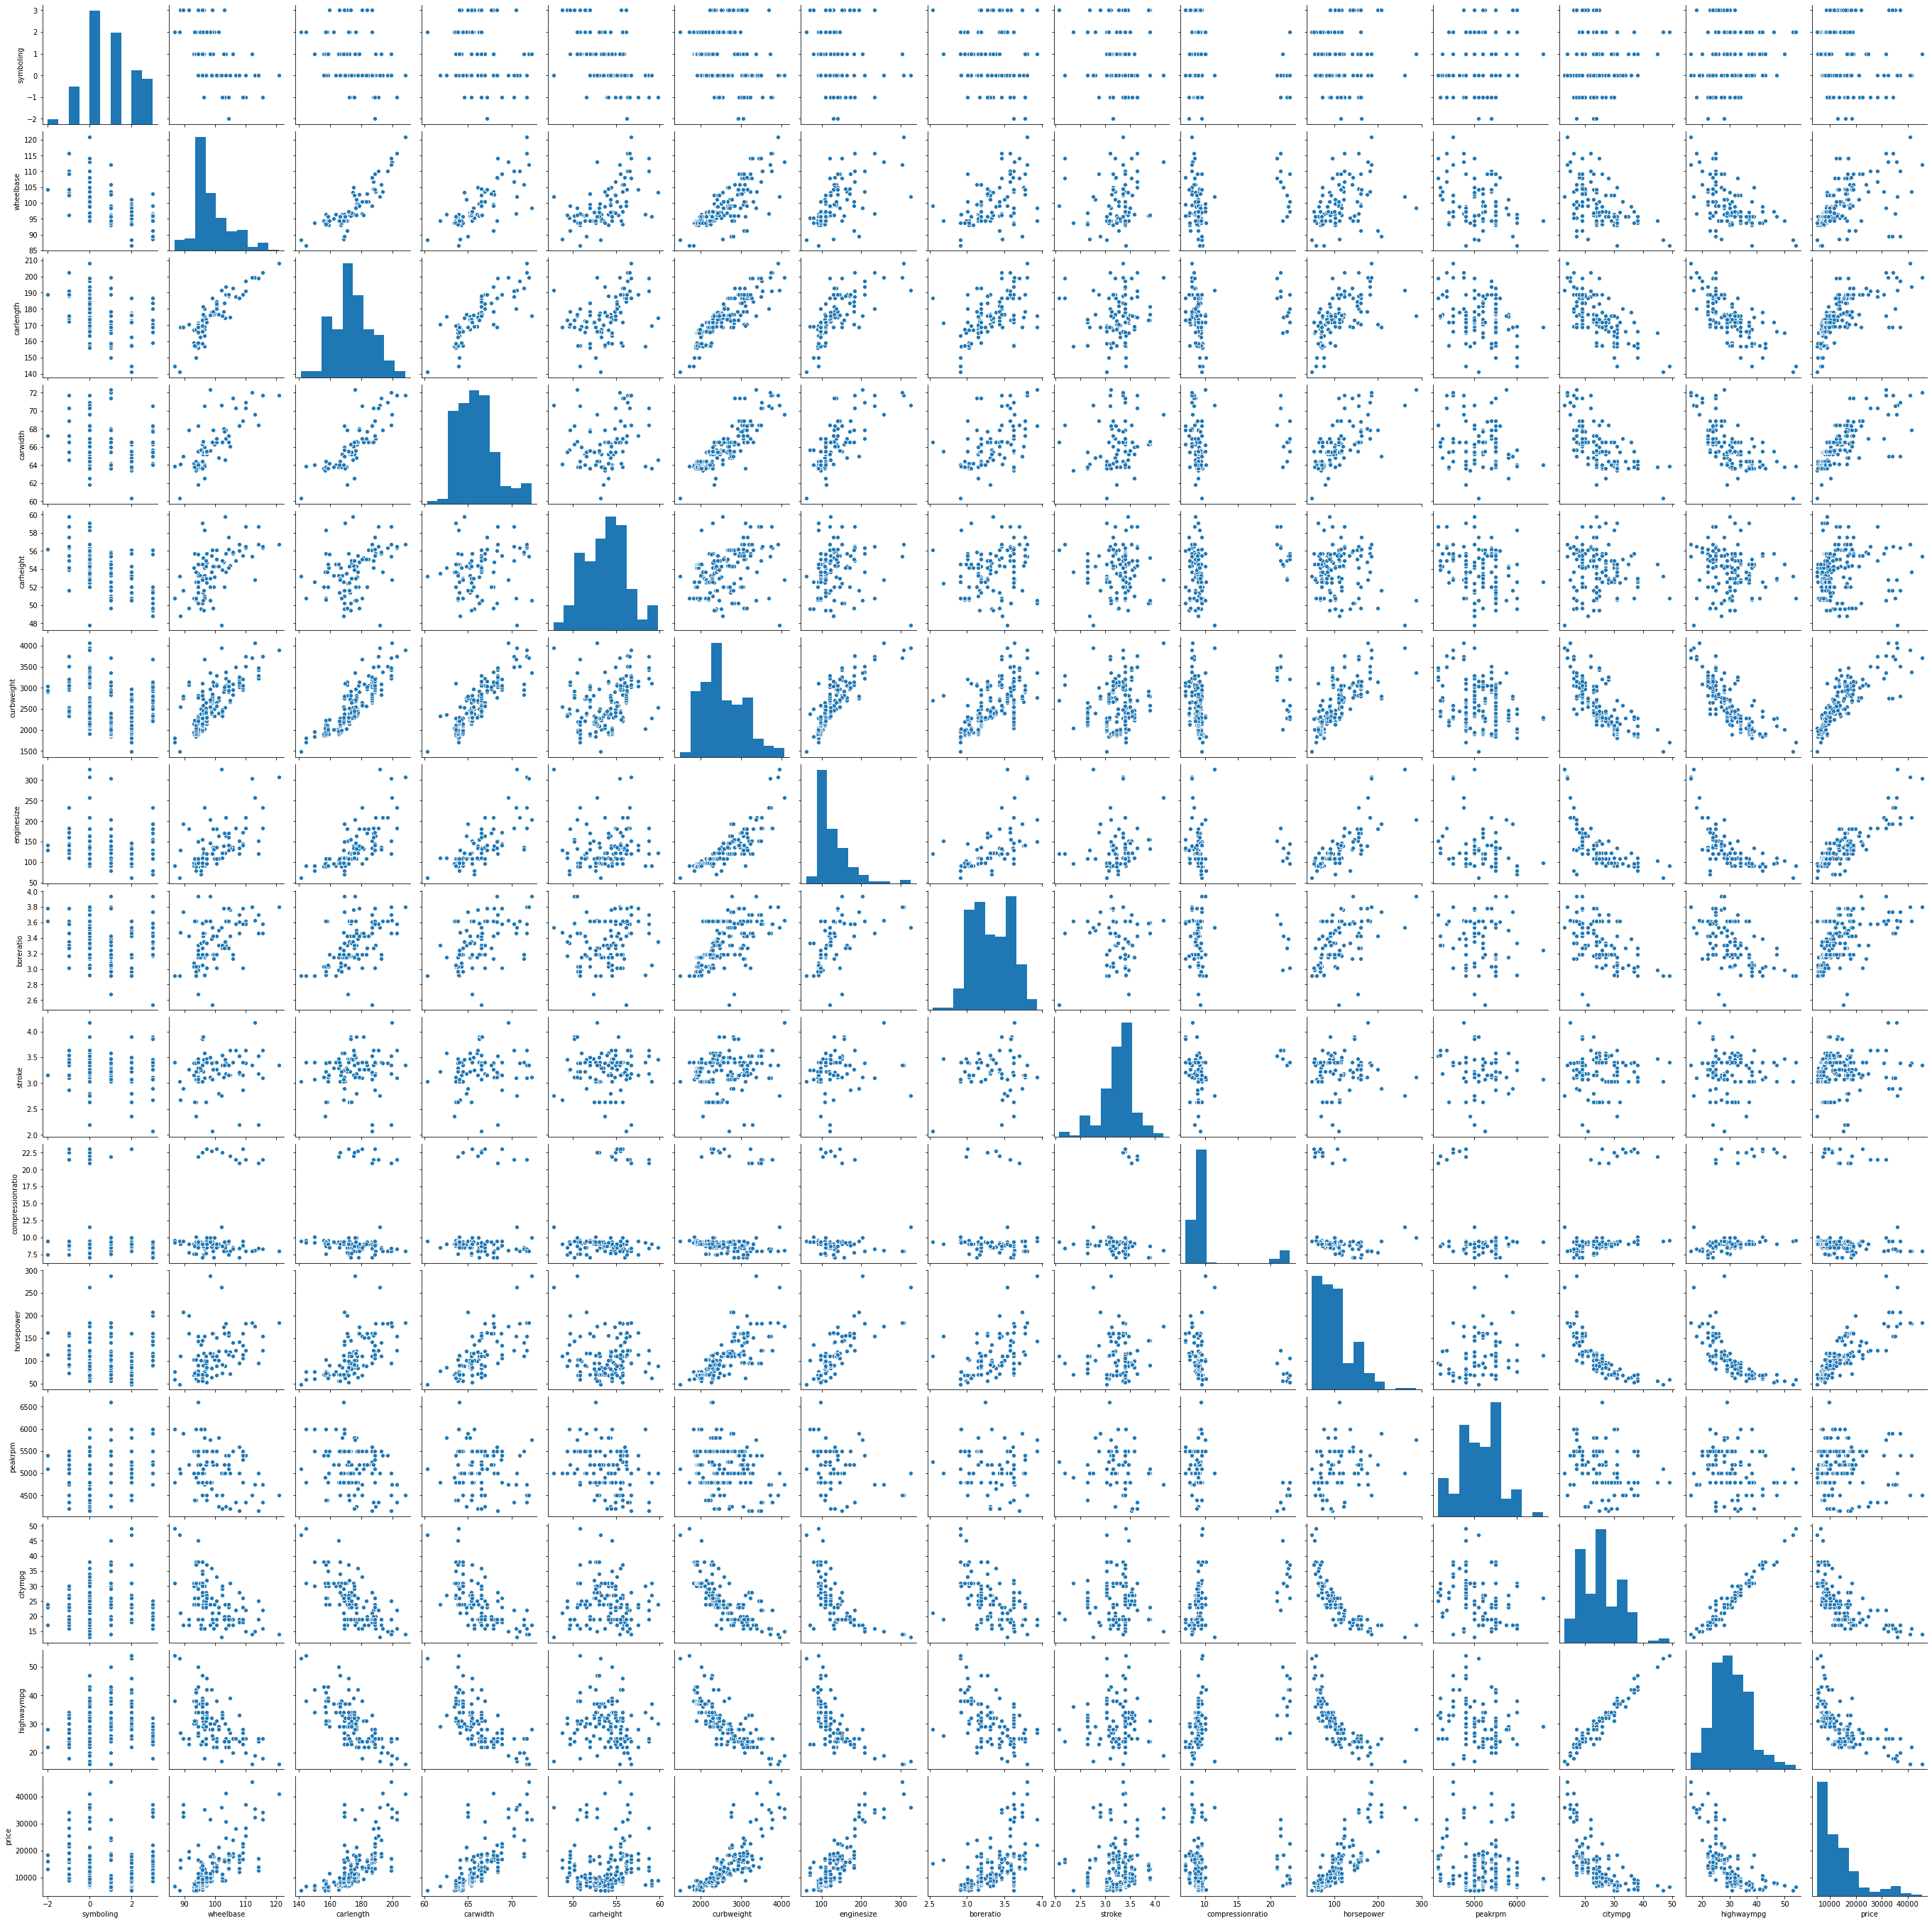

In [77]:
sns.pairplot(data)

# updating categorical features

In [78]:
data.drop(['CarName'],axis=1,inplace=True)

In [79]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['fueltype'] = encoder.fit_transform(data['fueltype'])
data['aspiration'] = encoder.fit_transform(data['aspiration'])
data['doornumber'] = encoder.fit_transform(data['doornumber'])
data['carbody'] = encoder.fit_transform(data['carbody'])
data['drivewheel'] = encoder.fit_transform(data['drivewheel'])
data['enginelocation'] = encoder.fit_transform(data['enginelocation'])
data['enginetype'] = encoder.fit_transform(data['enginetype'])
data['cylindernumber'] = encoder.fit_transform(data['cylindernumber'])
data['fuelsystem'] = encoder.fit_transform(data['fuelsystem'])

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    int64  
 2   aspiration        205 non-null    int64  
 3   doornumber        205 non-null    int64  
 4   carbody           205 non-null    int64  
 5   drivewheel        205 non-null    int64  
 6   enginelocation    205 non-null    int64  
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    int64  
 13  cylindernumber    205 non-null    int64  
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    int64  
 16  boreratio         205 non-null    float64
 1

# updating numerical features

In [81]:
data.drop(['symboling','stroke', 'peakrpm'], axis=1, inplace=True)

In [82]:
data.describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,53.724878,...,3.014634,2.117073,126.907317,3.253659,3.329756,10.142537,104.117073,25.219512,30.751220,13276.710571
std,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,2.443522,...,1.054765,0.795792,41.642693,2.013204,0.270844,3.972040,39.544167,6.542142,6.886443,7988.852332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,...,0.000000,0.000000,61.000000,0.000000,2.540000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,52.000000,...,3.000000,2.000000,97.000000,1.000000,3.150000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,...,3.000000,2.000000,120.000000,5.000000,3.310000,9.000000,95.000000,24.000000,30.000000,10295.000000
75%,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,55.500000,...,3.000000,2.000000,141.000000,5.000000,3.580000,9.400000,116.000000,30.000000,34.000000,16503.000000
max,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,59.800000,...,6.000000,6.000000,326.000000,7.000000,3.940000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [83]:
min_threshold_es, max_threshold_es = data.enginesize.quantile([0.01,0.95])
min_threshold_wb, max_threshold_wb = data.wheelbase.quantile([0.01,0.97]) 
min_threshold_es,max_threshold_es,min_threshold_wb, max_threshold_wb

(70.0, 201.19999999999985, 88.408, 114.056)

In [84]:
data.shape

(205, 21)

In [85]:
data2 = data[(data['enginesize'] > min_threshold_es) & (data['enginesize'] < max_threshold_es) & (data['wheelbase'] > min_threshold_wb) & (data['wheelbase'] < max_threshold_wb)]
data2.shape

(183, 21)

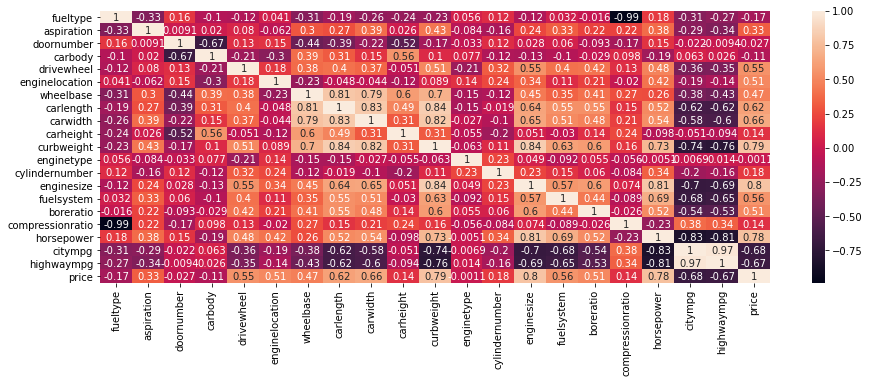

In [86]:
fig,ax = plt.subplots(figsize=(15,5))
ax = sns.heatmap(data2.corr(),annot=True)
plt.show()

# build model

without feature selection

In [87]:
X = data2.drop(['price'],axis=1)
y = data2.price

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,mean_absolute_error

In [90]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)
print(mean_absolute_error(lr_predict, y_test))
print(mean_squared_error(lr_predict, y_test))
print(mean_squared_log_error(lr_predict, y_test))
print(r2_score(lr_predict, y_test))
print(lr.score(X_test,y_test))

1734.7060630439541
5890502.310625085
0.031206763110272134
0.7016358378965292
0.7628059894857118


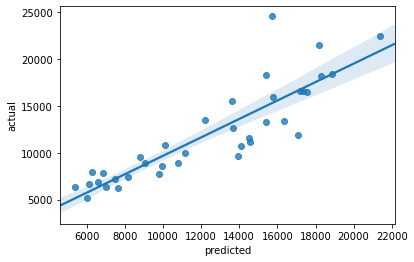

In [91]:
actual_predict = pd.DataFrame({"actual":y_test,"predicted":lr_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [92]:
lgbm = LGBMRegressor(n_estimators=50)
lgbm.fit(X_train,y_train)
lgbm_predict = lgbm.predict(X_test)
print(mean_absolute_error(lgbm_predict, y_test))
print(mean_squared_error(lgbm_predict, y_test))
print(mean_squared_log_error(lgbm_predict, y_test))
print(r2_score(lgbm_predict, y_test))
print(lgbm.score(X_test,y_test))

1462.9776582190052
3973579.6691958033
0.01971734223899612
0.8140936044030525
0.839995089020757


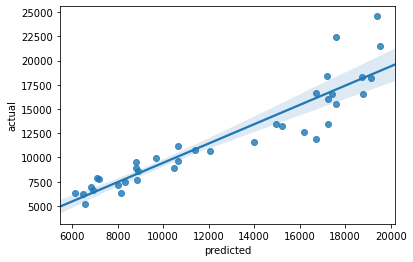

In [93]:
actual_predict = pd.DataFrame({"actual":y_test,"predicted":lgbm_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [94]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
print(mean_absolute_error(rf_predict, y_test))
print(mean_squared_error(rf_predict, y_test))
print(mean_squared_log_error(rf_predict, y_test))
print(r2_score(rf_predict, y_test))
print(rf.score(X_test,y_test))

1238.146868693694
4112507.5555664212
0.017086889520526595
0.7437599180240385
0.8344008526037573


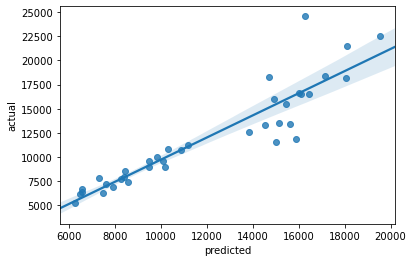

In [95]:
actual_predict = pd.DataFrame({"actual":y_test,"predicted":rf_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [96]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_predict = xgb.predict(X_test)
print(mean_absolute_error(xgb_predict, y_test))
print(mean_squared_error(xgb_predict, y_test))
print(mean_squared_log_error(xgb_predict, y_test))
print(r2_score(xgb_predict, y_test))
print(xgb.score(X_test,y_test))

1517.4874102618244
4803710.319786922
0.020519983938465203
0.6943948023351851
0.8065680554875764


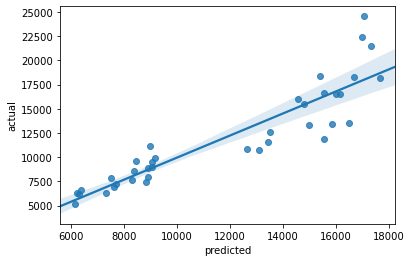

In [97]:
actual_predict = pd.DataFrame({"actual":y_test,"predicted":xgb_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

Random Forest Regressor is working well in this problem statement.

with feature selection

In [98]:
from sklearn.feature_selection import SelectKBest,f_regression

bestfeature = SelectKBest(k=13,score_func=f_regression)
fit = bestfeature.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(13,'Score'))

             Specs       Score
13      enginesize  317.756649
10      curbweight  299.484165
17      horsepower  283.539353
18         citympg  156.006327
19      highwaympg  143.581646
8         carwidth  140.118839
7        carlength  113.460372
14      fuelsystem   84.213815
4       drivewheel   79.575371
15       boreratio   63.940697
5   enginelocation   62.614709
6        wheelbase   50.680654
1       aspiration   22.455387


In [99]:
k_columns = ['enginesize','curbweight','horsepower','citympg','highwaympg','carwidth','carlength','fuelsystem',
             'drivewheel','boreratio','enginelocation','wheelbase','aspiration']
X2 = data2[k_columns]
y2 = data2.price

In [100]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,train_size=0.8,test_size=0.2)
print(X2_train.shape,X2_test.shape,y2_train.shape,y2_test.shape)

(146, 13) (37, 13) (146,) (37,)


In [101]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
lr_predict = lr.predict(X2_test)
print(mean_absolute_error(lr_predict, y2_test))
print(mean_squared_error(lr_predict, y2_test))
print(mean_squared_log_error(lr_predict, y2_test))
print(r2_score(lr_predict, y2_test))
print(lr.score(X2_test,y2_test))

1818.9197854610043
5846043.202116654
0.03409761103098942
0.730142941462405
0.7357695639364814


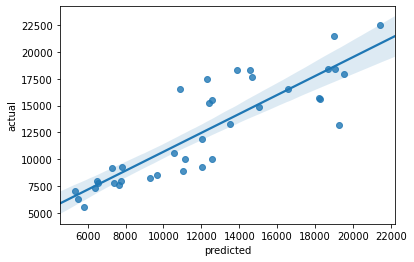

In [102]:
actual_predict = pd.DataFrame({"actual":y2_test,"predicted":lr_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [103]:
lgbm = LGBMRegressor(n_estimators=50)
lgbm.fit(X2_train,y2_train)
lgbm_predict = lgbm.predict(X2_test)
print(mean_absolute_error(lgbm_predict, y2_test))
print(mean_squared_error(lgbm_predict, y2_test))
print(mean_squared_log_error(lgbm_predict, y2_test))
print(r2_score(lgbm_predict, y2_test))
print(lgbm.score(X2_test,y2_test))

1615.3579199778042
5437957.8987890035
0.02803551015148606
0.7316652254853503
0.754214271565453


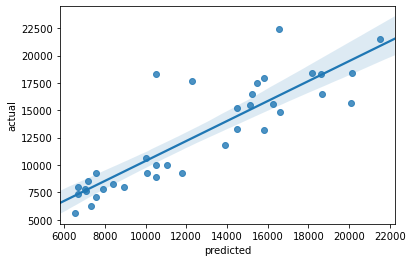

In [104]:
actual_predict = pd.DataFrame({"actual":y2_test,"predicted":lgbm_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [105]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X2_train,y2_train)
rf_predict = rf.predict(X2_test)
print(mean_absolute_error(rf_predict, y2_test))
print(mean_squared_error(rf_predict, y2_test))
print(mean_squared_log_error(rf_predict, y2_test))
print(r2_score(rf_predict, y2_test))
print(rf.score(X2_test,y2_test))

1541.1730281531534
4620751.606466768
0.024716780612132692
0.6839329323178669
0.7911504979169747


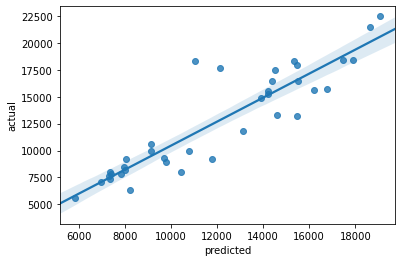

In [106]:
actual_predict = pd.DataFrame({"actual":y2_test,"predicted":rf_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

In [107]:
xgb = XGBRegressor()
xgb.fit(X2_train,y2_train)
xgb_predict = xgb.predict(X2_test)
print(mean_absolute_error(xgb_predict, y2_test))
print(mean_squared_error(xgb_predict, y2_test))
print(mean_squared_log_error(xgb_predict, y2_test))
print(r2_score(xgb_predict, y2_test))
print(xgb.score(X2_test,y2_test))

1457.2814743454392
4675735.883765717
0.027055844031700103
0.7278570292920441
0.7886653093774718


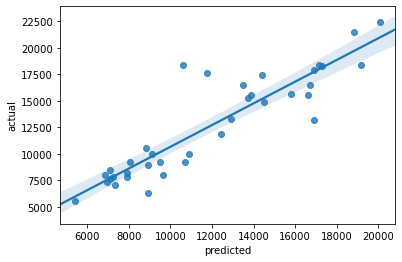

In [108]:
actual_predict = pd.DataFrame({"actual":y2_test,"predicted":xgb_predict})
sns.regplot(actual_predict['predicted'],actual_predict['actual'],truncate=False)

with the feature selection, Random Forest Regressor becoming more accurate and less error.